# Projet Apprentissage Statistiques: Rossman Stores Sales

FB Prophet: https://www.kaggle.com/arcticai/rossmann-sales-analysis-with-facebook-prophet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random


## I - Gestion et traitement de la donnée

In [2]:
train = pd.read_csv('./data/train.csv', low_memory=False, parse_dates=['Date'],sep=",")# le database fourni
test = pd.read_csv('./data/test.csv',sep=",")# le database fourni
store = pd.read_csv('./data/store.csv',sep=",")# le database fournit
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
store.head()
#store.dtypes

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train_store = train.merge(store, how='inner',on='Store')
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [6]:
#train_store.describe()
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [7]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
test_store = test.merge(store, how='inner',on='Store')
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
test_store.sort_values(by='Id',ascending=True,inplace=True)
test_store.reset_index(drop=True,inplace=True)
test_store

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

### I.A) Un peu de visualisation à travers des graphiques

https://www.kaggle.com/nguyntrncnghuy/rossmann-visualization

Text(0.5, 1.0, 'StoreType pie chart')

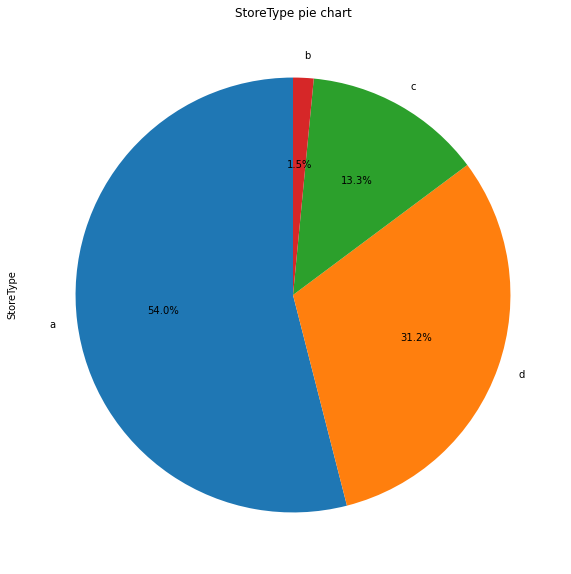

In [11]:
#StoreType pie
store_types = store['StoreType'].value_counts().sort_values(ascending=False)
ax= store_types.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('StoreType pie chart')

Text(0.5, 1.0, 'Assortment pie chart')

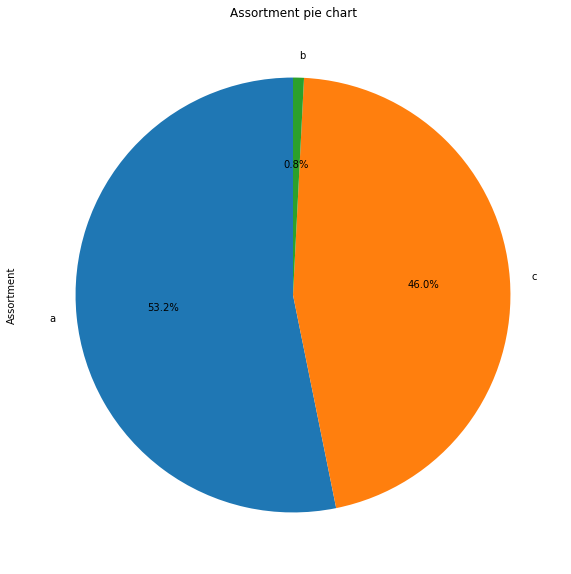

In [12]:
#Assortment pie
assortments = store['Assortment'].value_counts().sort_values(ascending=False)
ax=assortments.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('Assortment pie chart')

Text(0.5, 1.0, 'PromoInterval pie chart')

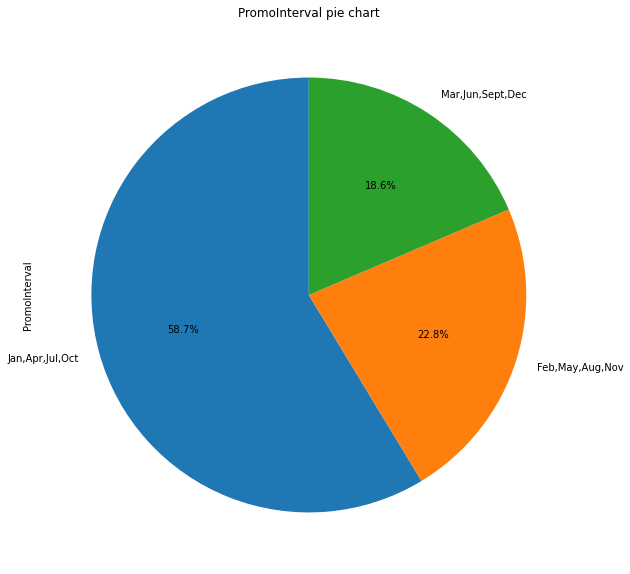

In [13]:
#PromoInterval hist
promo_intervals = store['PromoInterval'].value_counts().sort_values(ascending=False)
ax = promo_intervals.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('PromoInterval pie chart')

### I.B) Coorélations et approfondissement de la dataviz

<AxesSubplot:>

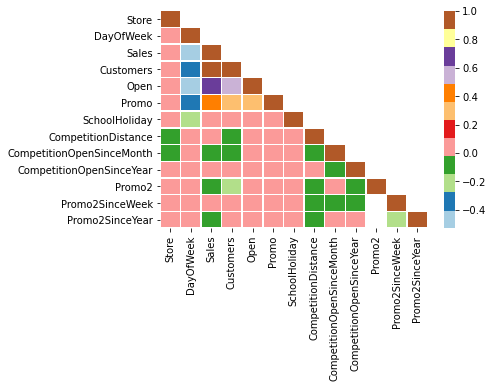

In [14]:
corr = train_store.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)
sns.heatmap(corr,linewidths=.5,cmap="Paired",mask=mask)

<AxesSubplot:xlabel='Promo2', ylabel='Sales'>

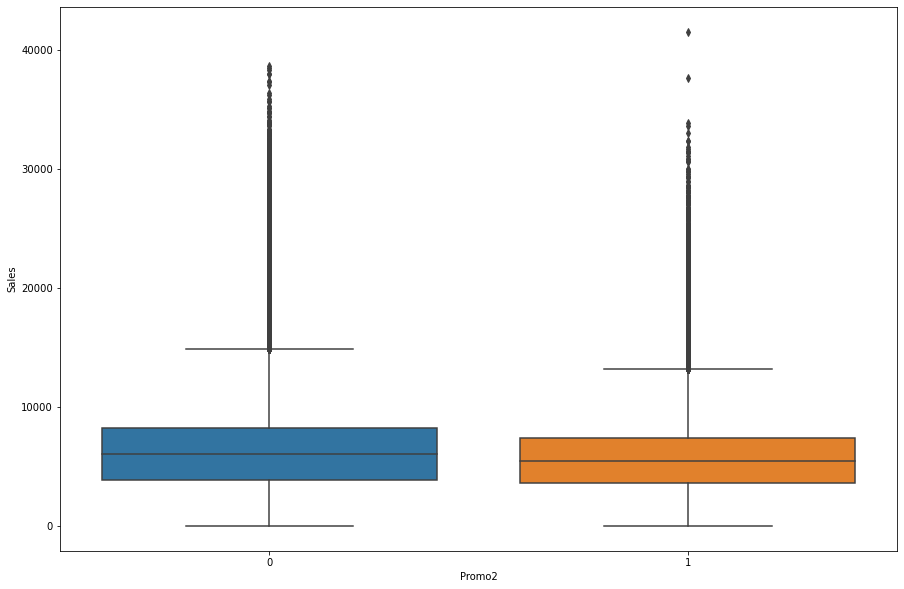

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Promo2", y="Sales", data=train_store, ax=ax)

### I.C) Dernières modifications des données avant construction la construction des modèles

In [16]:
##########Onsupprime les colonnes dont on ne veut pas se servir#########
train2=train_store.drop(['Customers','Promo2SinceWeek','Promo2SinceYear'],axis=1)

######################################On fill les na######################
train2['CompetitionDistance'].fillna(value=train2['CompetitionDistance'].mean(), inplace=True)
train2['CompetitionOpenSinceMonth'].fillna(value=train2['CompetitionOpenSinceMonth'].mean(),inplace=True)
train2['CompetitionOpenSinceYear'].fillna(value=train2['CompetitionOpenSinceYear'].mean(),inplace=True)

#train2.fillna(value={'CompetitionDistance': train2[['CompetitionDistance']].mean(), 'CompetitionOpenSinceMonth': train2[['CompetitionOpenSinceMonth']].mean(), 'CompetitionOpenSinceYear': train2[['CompetitionOpenSinceYear']].mean()},inplace=True)

Promo = train2['PromoInterval'].map({ float('nan'): 0, 'Jan,Apr,Jul,Oct': 1,
                                                             'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})
#Promo
train2[['Promo2']]=Promo
train2.drop(['PromoInterval'],axis=1,inplace=True)
train2.rename(columns={'Promo2':'Promo'}, inplace=True)

######### On transforme la Data ##############
train2['Year']=pd.DatetimeIndex(train2.Date).year
train2['Month']=pd.DatetimeIndex(train2.Date).month
train2['Day']=pd.DatetimeIndex(train2.Date).day

train2.drop(['Date'],axis=1,inplace=True)

In [17]:
######On tranformes variables qualitatives en variables quantitatives########
train2['StateHoliday'] = train2['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
train2['StoreType'] = train2['StoreType'].map({'a': 0, 'b': 1, 'c': 2, 'd': 3})
train2['Assortment'] = train2['Assortment'].map({'a': 0, 'b': 1, 'c': 2})

In [18]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Open                       1017209 non-null  int64  
 4   Promo                      1017209 non-null  int64  
 5   StateHoliday               1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   StoreType                  1017209 non-null  int64  
 8   Assortment                 1017209 non-null  int64  
 9   CompetitionDistance        1017209 non-null  float64
 10  CompetitionOpenSinceMonth  1017209 non-null  float64
 11  CompetitionOpenSinceYear   1017209 non-null  float64
 12  Promo                      1017209 non-null  int64  
 13  Year        

In [19]:
train2.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo,Year,Month,Day
0,1,5,5263,1,1,0,1,2,0,1270.0,9.0,2008.0,0,2015,7,31
1,1,4,5020,1,1,0,1,2,0,1270.0,9.0,2008.0,0,2015,7,30
2,1,3,4782,1,1,0,1,2,0,1270.0,9.0,2008.0,0,2015,7,29
3,1,2,5011,1,1,0,1,2,0,1270.0,9.0,2008.0,0,2015,7,28
4,1,1,6102,1,1,0,1,2,0,1270.0,9.0,2008.0,0,2015,7,27


In [20]:
##########Onsupprime les colonnes dont on ne veut pas se servir#########
test2=test_store.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1)

######################################On fill les na######################
test2['CompetitionDistance'].fillna(value=test2['CompetitionDistance'].mean(),inplace=True)
test2['CompetitionOpenSinceMonth'].fillna(value=test2['CompetitionOpenSinceMonth'].mean(),inplace=True)
test2['CompetitionOpenSinceYear'].fillna(value=test2['CompetitionOpenSinceYear'].mean(),inplace=True)
test2['Open'].fillna(value=0,inplace=True)

Promo = test2['PromoInterval'].map({ float('nan'): 0, 'Jan,Apr,Jul,Oct': 1,
                                                             'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})
#Promo
test2[['Promo2']]=Promo
test2.drop(['PromoInterval'],axis=1,inplace=True)
test2.rename(columns={'Promo2':'Promo'}, inplace=True)

######### On transforme la Data ##############
test2['Year']=pd.DatetimeIndex(test2.Date).year
test2['Month']=pd.DatetimeIndex(test2.Date).month
test2['Day']=pd.DatetimeIndex(test2.Date).day
test2.drop(['Date'],axis=1,inplace=True)


######On tranformes variables qualitatives en variables quantitatives########
test2['StateHoliday'] = test2['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
test2['StoreType'] = test2['StoreType'].map({'a': 0, 'b': 1, 'c': 2, 'd': 3})
test2['Assortment'] = test2['Assortment'].map({'a': 0, 'b': 1, 'c': 2})

In [21]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  int64  
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  int64  
 8   Assortment                 41088 non-null  int64  
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo                      41088 non-null  int64  
 13  Year                       41088 non-null  int

In [22]:
from sklearn.preprocessing import StandardScaler

tmp_store=train2[['Store']]
std_scaler = StandardScaler()
train2_scaled = std_scaler.fit_transform(train2.drop(['Store'],axis=1).to_numpy())
#train2_scaled = np.hstack((tmp_store.to, train2_scaled))

train2_scaled = pd.DataFrame(train2_scaled, columns=['DayOfWeek','Sales','Open','Promo','StateHoliday','SchoolHoliday',
                                                     'StoreType','Assortment','CompetitionDistance'
,'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo','Year','Month','Day'])

tmp_store.reset_index(inplace=True, drop=True)
train2_scaled = pd.concat([tmp_store, train2_scaled],axis=1)#, join_axes=[train2[['Store']].index])
train2_scaled.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo,Year,Month,Day
0,1,0.501484,-0.132683,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-0.824293,1.502077,0.346724,1.740766
1,1,0.000831,-0.195801,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-0.824293,1.502077,0.346724,1.626969
2,1,-0.499823,-0.257620,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-0.824293,1.502077,0.346724,1.513173
3,1,-1.000476,-0.198139,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-0.824293,1.502077,0.346724,1.399377
4,1,-1.501129,0.085244,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-0.824293,1.502077,0.346724,1.285581


In [23]:
train2_scaled.describe()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,1.837294e-16,-1.645154e-14,-2.900478e-15,-3.161189e-16,3.147000e-15,1.432114e-15,6.286104e-14,-1.382070e-14,-1.478017e-14,-2.173837e-13,-2.966704e-14,-1.040584e-13,1.399866e-13,3.090242e-15,2.942960e-17
std,3.219087e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000e+00,-1.501129e+00,-1.499723e+00,-2.210440e+00,-7.853998e-01,-1.592169e-01,-4.663720e-01,-8.843478e-01,-9.409746e-01,-7.021258e-01,-2.345885e+00,-2.196045e+01,-8.242933e-01,-1.070616e+00,-1.457193e+00,-1.673123e+00
25%,2.800000e+02,-1.000476e+00,-5.316517e-01,4.523985e-01,-7.853998e-01,-1.592169e-01,-4.663720e-01,-8.843478e-01,-9.409746e-01,-6.125770e-01,-4.609939e-01,-1.394579e-01,-8.242933e-01,-1.070616e+00,-8.558872e-01,-8.765488e-01
50%,5.580000e+02,8.308055e-04,-7.745340e-03,4.523985e-01,-7.853998e-01,-1.592169e-01,-4.663720e-01,-8.843478e-01,-9.409746e-01,-4.023319e-01,-6.696480e-16,-4.593998e-14,1.948931e-01,2.157305e-01,4.607142e-02,3.382143e-02
75%,8.380000e+02,1.002138e+00,5.408369e-01,4.523985e-01,1.273237e+00,-1.592169e-01,-4.663720e-01,1.312850e+00,1.071502e+00,1.881712e-01,6.699409e-01,4.666807e-01,1.948931e-01,2.157305e-01,6.473772e-01,8.303954e-01
max,1.115000e+03,1.502791e+00,9.292957e+00,4.523985e-01,1.273237e+00,1.041698e+01,2.144211e+00,1.312850e+00,1.071502e+00,9.140458e+00,1.800876e+00,1.274865e+00,2.233266e+00,1.502077e+00,1.849989e+00,1.740766e+00


In [24]:
################TEEEEEEEEEEEEEEEEEESTTTTTTT######################
#train2.query('Store == 1')
aaa=train2.iloc[[0]]
#aaa
aaa=aaa.drop(0)
aaa.shape
b=[i for i in range(10)]
I=[1,2,3]
#np.delete(b,I)

b2=np.array([1,2,3,4,5])
#print(type(b2))
#b2.tolist()
#print(type(b2.tolist()))

b.remove(3)
b
b.remove(8)
b
#sample qu'avec listes
# delete avec index list marche avec les np array et list
# tolist convertit en liste
# addition qu'vace les np array


[0, 1, 2, 4, 5, 6, 7, 9]

On construit ici la fonction qui nous permettra de faire de la Cross Validation à partir des indices:

In [25]:

def KFold_index(X,K):
    #import pandasql as ps
    
    res=[]
    nbrindices = 1115 // K
    #reste = 1115 % K
    index=[i for i in range(1,1115)]
    
    for k in range(K-1):
        tmp=X.iloc[[0]]#pr avoir la bon type d'objet/ réinitialiser
        index2 = random.sample(index, nbrindices)
        
        for i in index2:
            tmp2 = X.query(f"Store == {i}")
            tmp = pd.concat([tmp,tmp2])
            index.remove(i)
            
        #index2 = np.array(index2) - 1 # pour avoir les bons indices  #### marche pas, il faudraiut queje remove par nom 
        #index = np.delete(index, index2.tolist()).tolist() # on enleve les indices utilisées avant la prochaie itération sur k
        tmp=tmp.drop(0)# on enlve la ligne de création/réinitialisation
        res.append(tmp)
      
    
    ###### On s'occupe du dernier folde, qui contiendra plus d'indices que les autres probablement    
    tmp=train2.iloc[[0]]   
    for j in index:
            tmp2 = X.query(f"Store == {i}")
            tmp = pd.concat([tmp,tmp2])
    res.append(tmp)
    
    
    return res

In [26]:
K10fold = KFold_index(train2,10)

In [27]:
type(K10fold)
for i in range(10):
    #print(type(K10fold[i]))
    
    
    
    
    
    
    print(K10fold[i].shape)

(98674, 16)
(101434, 16)
(101249, 16)
(100882, 16)
(102906, 16)
(101250, 16)
(101801, 16)
(101066, 16)
(101802, 16)
(87171, 16)


In [28]:
K10fold_scaled = KFold_index(train2_scaled,10)

type(K10fold_scaled)
for i in range(10):
    #print(type(K10fold[i]))
    print(K10fold_scaled[i].shape)

(99777, 16)
(102722, 16)
(99410, 16)
(101250, 16)
(101617, 16)
(100514, 16)
(101802, 16)
(101802, 16)
(101066, 16)
(108331, 16)


In [29]:
#K10fold[0].iloc[:,1:3]
#K10fold[0].drop(['Sales'],axis=1)

In [30]:
K10fold[0].drop(['Sales'],axis=1).iloc[0,1]

5

In [31]:
#K10fold[0].drop(['Sales'],axis=1)

<h1  style="color:white; background-color:blue; padding:50px; border-radius: 10px;">    
II - Construction de modèles
</h1>

<h1  style="color:white; background-color:#808b96; border-radius: 10px; padding:15px;">
vérification des hypothèse
</h1>

<h1  style="color:white; background-color:#808b96; border-radius: 10px; padding:15px;">
Modèle Linéaire
</h1>

## Données non scaled 


https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

In [32]:
def kaggle_error(Ypred,Yvrai):
    Ypred= pd.DataFrame(Ypred)
    Yvrai= pd.DataFrame(Yvrai)
    n = Yvrai.shape[0]
    #print(n)
    res= 0
    for i in range(n):
        res += ( (Yvrai.iloc[i,0] - Ypred.iloc[i,0]) / Yvrai.iloc[i,0])**2
    return (1/n)*res

def kaggle_error_vrai(Ypred,Yvrai):
    Ypred= pd.DataFrame(Ypred)
    Yvrai= pd.DataFrame(Yvrai)
    n = Yvrai.shape[0]
    m=0
    #print(n)
    res= 0
    for i in range(n):
        if Yvrai.iloc[i,0] != 0: # Pcq pour la pred finale, on fixera à la main les vlaurs 0 lorsque boutique fermé
            res += ( (Yvrai.iloc[i,0] - Ypred.iloc[i,0]) / Yvrai.iloc[i,0])**2
            m += 1
    return np.sqrt((1/m)*res)

In [36]:
from sklearn.linear_model import LinearRegression # sklearn.linear_model est un subpackages
from sklearn.model_selection import train_test_split




donees_train=train2.drop('Sales',axis=1)
donnees_test= train2[['Sales']]
X_train, X_test, Y_train, Y_test = train_test_split(donees_train, donnees_test, test_size=0.25)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train) # entrainement du modele
lin_model.score(X_train, Y_train) # évaluation avec le coefficient de détermination. TOUJOURS LUI si fait comme ca

0.5537781324335509

In [37]:
Y_pred=lin_model.predict(X_test)

from sklearn import metrics

np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

2564.1243955112004

In [ ]:
#kaggle_error(Y_pred,Y_test)

In [38]:
kaggle_error_vrai(Y_pred,Y_test)

0.5203346765561151

## On effectue la Cross Validation sur les données non scaled

In [ ]:
resfinal_R=[]
resfinal_kag_eroor=[]
resfinal_rmse=[]

for k in range(10):
    
    ## on s'occupe du Fold encours
    X_train=train2.drop(['Sales'],axis=1).iloc[[0]]
    Y_train = train2[['Sales']].iloc[[0]]
    for k2 in range(10):
        if k2 != k:
            X_train = pd.concat( [X_train,K10fold[k].drop(['Sales'],axis=1)] )
            Y_train = pd.concat( [Y_train, K10fold[k][['Sales']] ] )
   
    X_train=X_train.drop(0)
    Y_train=Y_train.drop(0)

    X_test = K10fold[k].drop(['Sales'],axis=1)
    Y_test = K10fold[k][['Sales']]

    
    
    ## On s'occupe du modèle
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train) # entrainement du modele
    Y_pred=lin_model.predict(X_test)
    
    ## on stocke les résultats
    resfinal_R.append( lin_model.score(X_train, Y_train) ) 
    resfinal_rmse.append( np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)) )
    resfinal_kag_eroor.append( kaggle_error_vrai(Y_pred,Y_test) )
    
print('\n On obtient une valeur moyenne de R carré de:',np.mean(resfinal_R))
print('\n On obtient une valeur moyenne de RMSE carré de:',np.mean(resfinal_rmse))
print('\n On obtient une valeur moyenne de RMSPE carré de:',np.mean(resfinal_kag_eroor))

http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Regression_Lasso_Python.pdf

## Données scaled

In [ ]:


X_train = pd.concat([ K10fold_scaled[0].drop(['Sales'],axis=1), K10fold_scaled[1].drop(['Sales'],axis=1), 
                     K10fold_scaled[2].drop(['Sales'],axis=1), K10fold_scaled[3].drop(['Sales'],axis=1), 
                     K10fold_scaled[4].drop(['Sales'],axis=1), K10fold_scaled[5].drop(['Sales'],axis=1),
                     K10fold_scaled[6].drop(['Sales'],axis=1), K10fold_scaled[7].drop(['Sales'],axis=1),
                     K10fold_scaled[8].drop(['Sales'],axis=1) ])

Y_train=pd.concat([ K10fold_scaled[0][['Sales']], K10fold_scaled[1][['Sales']], K10fold_scaled[2][['Sales']],
                   K10fold_scaled[3][['Sales']], K10fold_scaled[4][['Sales']], K10fold_scaled[5][['Sales']],
                   K10fold_scaled[6][['Sales']], K10fold_scaled[7][['Sales']], K10fold_scaled[8][['Sales']] ])

#X_test = K10fold_scaled[9].drop(['Sales'],axis=1)
#Y_test = K10fold_scaled[9][['Sales']]

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train) # entrainement du modele
lin_model.score(X_train, Y_train) # évaluation avec le coefficient de détermination. TOUJOURS LUI si fait comme ca

In [ ]:
Y_pred=lin_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

In [ ]:
kaggle_error_vrai(Y_pred,Y_test)

In [ ]:
Y_pred

In [ ]:
pd.DataFrame(Y_pred).shape

<h1  style="color:white; background-color:#808b96; border-radius: 10px; padding:15px;">
Lasso regression:
</h1>

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold

X_train = pd.concat([ K10fold[0].drop(['Sales'],axis=1), K10fold[1].drop(['Sales'],axis=1), K10fold[2].drop(['Sales'],axis=1)
                   , K10fold[3].drop(['Sales'],axis=1), K10fold[4].drop(['Sales'],axis=1), K10fold[5].drop(['Sales'],axis=1), 
                   K10fold[6].drop(['Sales'],axis=1), K10fold[7].drop(['Sales'],axis=1), K10fold[8].drop(['Sales'],axis=1) ])

Y_train=pd.concat([ K10fold[0][['Sales']], K10fold[1][['Sales']], K10fold[2][['Sales']], K10fold[3][['Sales']], 
                   K10fold[4][['Sales']], K10fold[5][['Sales']], K10fold[6][['Sales']], K10fold[7][['Sales']], 
                   K10fold[8][['Sales']] ])

X_test = K10fold[9].drop(['Sales'],axis=1)
Y_test = K10fold[9][['Sales']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ZTrain =sc.fit_transform(X_train)
YTrain = sc.fit_transform(Y_train)
                         


from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lcv = LassoCV(alphas=arange(0.01, 1, 0.01),cv=10)
lcv.fit(X_train,Y_train) 

ZTest = sc.fit_transform(X_test)
Y_pred = lcv.predict(X_test)
print(Y_pred.shape)


#Y_pred = Y_pred*np.sqrt(sc.var_[0]) + sc.mean_[0]

In [ ]:
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print(kaggle_error_vrai(Y_pred,Y_test))

In [ ]:
test2

In [ ]:
test2_final=test2.drop('Id',axis=1)

submission_1 = lcv.predict(test2_final)


submission_1=pd.DataFrame(submission_1,index=[i for i in range(0, len(submission_1))],columns=['Sales'])


submission_2=submission_1.copy()
sub_3=pd.concat([submission_2, test[['Open']]], axis=1)
sub_3.loc[sub_3['Open']==0,'Sales'] = 0 #astuce de fixer les zéros

sub_3.reset_index()
sub_3.index = sub_3.index + 1

submission_1.reset_index()
submission_1.index = submission_1.index + 1

submission_1[['Sales']].to_csv('submission_lasso1_1.csv', encoding='utf-8')# tel quel
sub_3[['Sales']].to_csv('submission_lasso1_2.csv', encoding='utf-8')# avec astuce des 0

In [ ]:
#test2.iloc[[0]]
test2#iloc[0,5]

## On fait test et train avec train_test_split:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold



donees_train=train2.drop('Sales',axis=1)
donnees_test= train2[['Sales']]
X_train, X_test, y_train, y_test = train_test_split(donees_train, donnees_test, test_size=0.25)

cv = RepeatedKFold(n_splits=10, n_repeats=3)

lcv = LassoCV(alphas=arange(0.01, 1, 0.01),cv=cv)
lcv.fit(X_train,y_train) 

Y_pred = lcv.predict(X_test)



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
print(np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
print(kaggle_error_vrai(Y_pred,y_test))

2573.8396846740325
0.5023765433644789


In [41]:
test2_final=test2.drop('Id',axis=1)

submission_1 = lcv.predict(test2_final)


submission_1=pd.DataFrame(submission_1,index=[i for i in range(0, len(submission_1))],columns=['Sales'])


submission_2=submission_1.copy()
sub_3=pd.concat([submission_2, test[['Open']]], axis=1)
sub_3.loc[sub_3['Open']==0,'Sales'] = 0 #astuce de fixer les zéros

sub_3.reset_index()
sub_3.index = sub_3.index + 1

submission_1.reset_index()
submission_1.index = submission_1.index + 1

submission_1[['Sales']].to_csv('submission_lasso_tts_1.csv', encoding='utf-8')# tel quel
sub_3[['Sales']].to_csv('submission_lasso_tts_2.csv', encoding='utf-8')# avec astuce des 0

## On essaie avec 2 fold on test et le reste entrainement: 

In [ ]:
X_train = pd.concat([ K10fold[0].drop(['Sales'],axis=1), K10fold[1].drop(['Sales'],axis=1), K10fold[2].drop(['Sales'],axis=1)
                   , K10fold[3].drop(['Sales'],axis=1), K10fold[4].drop(['Sales'],axis=1), K10fold[5].drop(['Sales'],axis=1), 
                   K10fold[6].drop(['Sales'],axis=1), K10fold[7].drop(['Sales'],axis=1)])

Y_train=pd.concat([ K10fold[0][['Sales']], K10fold[1][['Sales']], K10fold[2][['Sales']], K10fold[3][['Sales']], 
                   K10fold[4][['Sales']], K10fold[5][['Sales']], K10fold[6][['Sales']], K10fold[7][['Sales']] ])

X_test = pd.concat([ K10fold[9].drop(['Sales'],axis=1), K10fold[8].drop(['Sales'],axis=1) ] )
Y_test = pd.concat([ K10fold[9][['Sales']], K10fold[8][['Sales']] ] )

cv = RepeatedKFold(n_splits=10, n_repeats=3)

lcv_V2 = LassoCV(alphas=arange(0.01, 1, 0.01),cv=10)
lcv_V2.fit(X_train,Y_train) 

Y_pred = lcv_V2.predict(X_test)



In [ ]:
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print(kaggle_error_vrai(Y_pred,Y_test))

In [ ]:
test2_final=test2.drop('Id',axis=1)

submission_1 = lcv_V2.predict(test2_final)


submission_1=pd.DataFrame(submission_1,index=[i for i in range(1, len(submission_1)+1)],columns=['Sales'])

submission_1[['Sales']].to_csv('submission_lasso1_V2.csv', encoding='utf-8')# tel quel

<h1  style="color:white; background-color:#808b96; border-radius: 10px; padding:15px;">
Lasso Part 2
</h1>

In [42]:
# d a c b
# 3 0 2 1
def Sep_stores_by_type(X):
    res=[]
    K=4
    for k in range(K): 
        tmp = X[X.StoreType == k ]
        res.append(tmp)   
    return res

In [43]:
#Fold_Stores_type=Sep_stores_by_type(train2)
Fold_Stores_type=Sep_stores_by_type(train2.loc[train2['Year']== 2015])

print(Fold_Stores_type[0].shape)
print(Fold_Stores_type[1].shape)
print(Fold_Stores_type[2].shape)
print(Fold_Stores_type[3].shape)

(127624, 16)
(3604, 16)
(31376, 16)
(73776, 16)


In [44]:

res_model=[]
for i in range(4):# entrainement de chacun des 4 modèles sur toutes les données de son type
    X_train =  Fold_Stores_type[i].drop(['Sales'],axis=1)
    Y_train = Fold_Stores_type[i][['Sales']]
    
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    #lcv_VV = LassoCV(alphas=arange(0.01, 1, 0.01),cv=10)
    #lcv_VV.fit(X_train,Y_train)
    res_model.append(lin_model)
    

In [45]:
len(res_model)

4

In [ ]:
res_model[0].coef_

In [ ]:
res_model[1].coef_

In [46]:
train2.loc[train2['Year']== 2015]

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo,Year,Month,Day
0,1,5,5263,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,2015,7,31
1,1,4,5020,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,2015,7,30
2,1,3,4782,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,2015,7,29
3,1,2,5011,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,2015,7,28
4,1,1,6102,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016474,1115,1,9102,1,1,0,1,3,2,5350.0,7.222866,2008.690228,3,2015,1,5
1016475,1115,7,0,0,0,0,1,3,2,5350.0,7.222866,2008.690228,3,2015,1,4
1016476,1115,6,6468,1,0,0,1,3,2,5350.0,7.222866,2008.690228,3,2015,1,3
1016477,1115,5,7558,1,0,0,1,3,2,5350.0,7.222866,2008.690228,3,2015,1,2


In [47]:
## evaluation des valeurs dans test

res_lasso_4=[]
for i in range(len(test2_final)):
    
    if(test2_final.iloc[i,6] == 3):
        res_lasso_4.append( res_model[3].predict(test2_final.iloc[[i]])[0] )
        
    elif(test2_final.iloc[i,6] == 0):
        res_lasso_4.append( res_model[0].predict(test2_final.iloc[[i]])[0] )
        
    elif(test2_final.iloc[i,6] == 1):
        res_lasso_4.append( res_model[1].predict(test2_final.iloc[[i]])[0] )
        
    else:
        res_lasso_4.append( res_model[2].predict(test2_final.iloc[[i]])[0] )
        

In [48]:
res_lasso_4

[array([8243.01009221]),
 array([7091.84784059]),
 array([8648.57604035]),
 array([7746.89863484]),
 array([9105.18170925]),
 array([7935.34191429]),
 array([8607.73935647]),
 array([8817.2711827]),
 array([7796.62846827]),
 array([7945.16581391]),
 array([8791.97989646]),
 array([9111.54279334]),
 array([8034.92646874]),
 array([8082.61129742]),
 array([7923.48552684]),
 array([7745.51901364]),
 array([8392.56761882]),
 array([8936.82176971]),
 array([7973.24259851]),
 array([8099.24057944]),
 array([9079.18425019]),
 array([7319.42218668]),
 array([8979.1279801]),
 array([7331.85918401]),
 array([9275.59937439]),
 array([8848.43647283]),
 array([8897.14381169]),
 array([8413.89894471]),
 array([7257.34629852]),
 array([7414.4093713]),
 array([8793.51930921]),
 array([8844.79185612]),
 array([8049.12527305]),
 array([8270.37201271]),
 array([7791.47613321]),
 array([9002.62145384]),
 array([8212.4364956]),
 array([8973.56109453]),
 array([8291.23549103]),
 array([8536.9213877]),
 arra

In [49]:
submission_1=pd.DataFrame(res_lasso_4,index=[i for i in range(0, len(res_lasso_4))],columns=['Sales'])


submission_2=submission_1.copy()
sub_3=pd.concat([submission_2, test[['Open']]], axis=1)
sub_3.loc[sub_3['Open']==0,'Sales'] = 0 #astuce de fixer les zéros

sub_3.reset_index()
sub_3.index = sub_3.index + 1

submission_1.reset_index()
submission_1.index = submission_1.index + 1

submission_1[['Sales']].to_csv('submission_lasso_by_store_1.csv', encoding='utf-8')# tel quel
sub_3[['Sales']].to_csv('submission_lasso_by_store_2.csv', encoding='utf-8')# avec astuce des 0

<h1  style="color:white; background-color:#808b96; border-radius: 10px; padding:15px;">
Random Forest 
</h1>

## Random Forest: 9 fold train, 1 fold test

In [91]:
from sklearn.ensemble import RandomForestRegressor

#X_train = pd.concat([ K10fold[0].drop(['Sales'],axis=1), K10fold[1].drop(['Sales'],axis=1), K10fold[2].drop(['Sales'],axis=1)
#                   , K10fold[3].drop(['Sales'],axis=1), K10fold[4].drop(['Sales'],axis=1), K10fold[5].drop(['Sales'],axis=1), 
#                   K10fold[6].drop(['Sales'],axis=1), K10fold[7].drop(['Sales'],axis=1), K10fold[8].drop(['Sales'],axis=1) ])

#Y_train=pd.concat([ K10fold[0][['Sales']], K10fold[1][['Sales']], K10fold[2][['Sales']], K10fold[3][['Sales']], 
#                   K10fold[4][['Sales']], K10fold[5][['Sales']], K10fold[6][['Sales']], K10fold[7][['Sales']], 
#                   K10fold[8][['Sales']] ])

#X_test = K10fold[9].drop(['Sales'],axis=1)
#Y_test = K10fold[9][['Sales']]


from sklearn.model_selection import train_test_split

#donees_train=train2.drop('Sales',axis=1).loc[train2['Year']== 2014]
#donnees_test= train2.loc[train2['Year']== 2014][['Sales']]

donees_train=train2.drop('Sales',axis=1)[ (train2['Year']== 2014)  & (train2['Month'] >= 8 ) & (train2['Month'] <= 9 )]
donnees_test=train2[ (train2['Year']== 2014)  & (train2['Month'] >= 8 ) & (train2['Month'] <= 9 )][['Sales']]
X_train, X_test, y_train, y_test = train_test_split(donees_train, donnees_test, test_size=0.25)

clf=RandomForestRegressor()#random_state=2
clf.fit(X_train,y_train)

Y_pred=clf.predict(X_test)

clf.score(X_train,y_train)


<ipython-input-91-5b3aa82883c7>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.9901095794785479

In [92]:
print(np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
print(kaggle_error_vrai(Y_pred,y_test))

941.3735722497087
0.14360741814214312


In [93]:
train2.drop('Sales',axis=1)[ (train2['Year']== 2014)  & (train2['Month'] >= 8 ) & (train2['Month'] <= 9 )]
#train2[ (train2['Year']== 2014)  & (train2['Month'] >= 8 ) & (train2['Month'] <= 9 )][['Sales']]

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo,Year,Month,Day
304,1,2,1,1,0,0,2,0,1270.0,9.000000,2008.000000,0,2014,9,30
305,1,1,1,1,0,0,2,0,1270.0,9.000000,2008.000000,0,2014,9,29
306,1,7,0,0,0,0,2,0,1270.0,9.000000,2008.000000,0,2014,9,28
307,1,6,1,0,0,0,2,0,1270.0,9.000000,2008.000000,0,2014,9,27
308,1,5,1,0,0,0,2,0,1270.0,9.000000,2008.000000,0,2014,9,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016627,1115,2,1,1,0,1,3,2,5350.0,7.222866,2008.690228,3,2014,8,5
1016628,1115,1,1,1,0,1,3,2,5350.0,7.222866,2008.690228,3,2014,8,4
1016629,1115,7,0,0,0,1,3,2,5350.0,7.222866,2008.690228,3,2014,8,3
1016630,1115,6,1,0,0,1,3,2,5350.0,7.222866,2008.690228,3,2014,8,2


In [94]:
test2_final=test2.drop('Id',axis=1)

submission_1 = clf.predict(test2_final)


submission_1=pd.DataFrame(submission_1,index=[i for i in range(0, len(submission_1))],columns=['Sales'])


submission_2=submission_1.copy()
sub_3=pd.concat([submission_2, test[['Open']]], axis=1)
sub_3.loc[sub_3['Open']==0,'Sales'] = 0 #astuce de fixer les zéros
sub_3.reset_index()
sub_3.index = sub_3.index + 1

submission_1.reset_index()
submission_1.index = submission_1.index + 1

submission_1[['Sales']].to_csv('submission_ramdonF_1.csv', encoding='utf-8')# tel quel
sub_3[['Sales']].to_csv('submission_ramdonF_2.csv', encoding='utf-8')# avec astuce des 0

## On fait random forest par Store:

In [97]:
#Fold_Stores_type=Sep_stores_by_type(train2)
#Fold_Stores_type=Sep_stores_by_type(train2.loc[train2['Year']== 2014])
Fold_Stores_type=Sep_stores_by_type(train2[ (train2['Year']== 2014)  & (train2['Month'] >= 8 ) & (train2['Month'] <= 9 )])


print(Fold_Stores_type[0].shape)
print(Fold_Stores_type[1].shape)
print(Fold_Stores_type[2].shape)
print(Fold_Stores_type[3].shape)

(31598, 16)
(976, 16)
(8174, 16)
(16287, 16)


In [98]:
res_model=[]
for i in range(4):# entrainement de chacun des 4 modèles sur toutes les données de son type
    X_train =  Fold_Stores_type[i].drop(['Sales'],axis=1)
    Y_train = Fold_Stores_type[i][['Sales']]
    
    
    clf=RandomForestRegressor()
    clf.fit(X_train,Y_train)
    #lcv_VV = LassoCV(alphas=arange(0.01, 1, 0.01),cv=10)
    #lcv_VV.fit(X_train,Y_train)
    res_model.append(clf)
   

<ipython-input-98-717560dfd2ec>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)
<ipython-input-98-717560dfd2ec>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)
<ipython-input-98-717560dfd2ec>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)
<ipython-input-98-717560dfd2ec>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


In [99]:
len(res_model)
#print(res_model[0].coef_)
#print(res_model[0].coef_)

4

In [100]:
res_lasso_4=[]
for i in range(len(test2_final)):
    
    if(test2_final.iloc[i,6] == 3):
        res_lasso_4.append( res_model[3].predict(test2_final.iloc[[i]])[0] )
        
    elif(test2_final.iloc[i,6] == 0):
        res_lasso_4.append( res_model[0].predict(test2_final.iloc[[i]])[0] )
        
    elif(test2_final.iloc[i,6] == 1):
        res_lasso_4.append( res_model[1].predict(test2_final.iloc[[i]])[0] )
        
    else:
        res_lasso_4.append( res_model[2].predict(test2_final.iloc[[i]])[0] )
        

In [101]:
submission_1=pd.DataFrame(res_lasso_4,index=[i for i in range(0, len(res_lasso_4))],columns=['Sales'])


submission_2=submission_1.copy()
sub_3=pd.concat([submission_2, test[['Open']]], axis=1)
sub_3.loc[sub_3['Open']==0,'Sales'] = 0 #astuce de fixer les zéros

sub_3.reset_index()
sub_3.index = sub_3.index + 1

submission_1.reset_index()
submission_1.index = submission_1.index + 1

submission_1[['Sales']].to_csv('submission_RF_bystore_1.csv', encoding='utf-8')# tel quel
sub_3[['Sales']].to_csv('submission_RF_bystore_2.csv', encoding='utf-8')# avec astuce des 0